In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt    
import yfinance as yf
import quantstats as qs

In [5]:
class backtesting:
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

        self.get_data()
        self.indicators()
        self.positions()
        self.analysis()

    def get_data(self):
        self.df = yf.download(self.ticker, self.start, self.end)

    def indicators(self):
        self.df['simple_returns'] = self.df['Close'].pct_change()

    
    def positions(self):
        self.df['positions'] = np.where(self.df['Close'] > self.df['Close'].shift(1), 1, 0)
        self.df['positions'] = self.df['positions'].shift(1)
        self.df['strategy_returns'] = self.df['positions'] * self.df['simple_returns']
        self.df['simple_returns'] = self.df['simple_returns'] + 1
        self.df['strategy_returns'] = self.df['strategy_returns'] + 1

    def analysis(self):
        self.df[['simple_returns', 'strategy_returns']].cumprod().plot(grid=True)
        print('simple returns were:', self.df['simple_returns'].cumprod()[-1] - 1)
        print('strategy returns were:', self.df['strategy_returns'].cumprod()[-1] - 1)
        
        qs.reports.basic(self.df['strategy_returns'])

[*********************100%%**********************]  1 of 1 completed
simple returns were: 1.4250240369256133
strategy returns were: 1.4036543065591545


                    Strategy
------------------  ----------
Start Period        2017-11-14
End Period          2024-10-07
Risk-Free Rate      0.0%
Time in Market      78.0%

Cumulative Return   -0.0%
CAGR﹪              -0.0%

Sharpe              0.09
Prob. Sharpe Ratio  59.14%
Sortino             0.12
Sortino/√2          0.09
Omega               1.02

Max Drawdown        -16.08%
Longest DD Days     1657

Gain/Pain Ratio     0.02
Gain/Pain (1M)      0.45

Payoff Ratio        0.81
Profit Factor       1.02
Common Sense Ratio  0.94
CPC Index           0.46
Tail Ratio          0.92
Outlier Win Ratio   5.56
Outlier Loss Ratio  3.47

MTD                 0.0%
3M                  -0.09%
6M                  0.0%
YTD                 0.22%
1Y                  -0.55%
3Y (ann.)           -0.0%
5Y (ann.)           -0.0%
10Y (ann.)          -0.0%
All-time (ann.)     -0.0%

Avg. Drawdown       -5.6%
Avg. Drawdown Days  357
Recovery Factor     0.66
Ulcer Index         0.05
Serenity Index      0.28


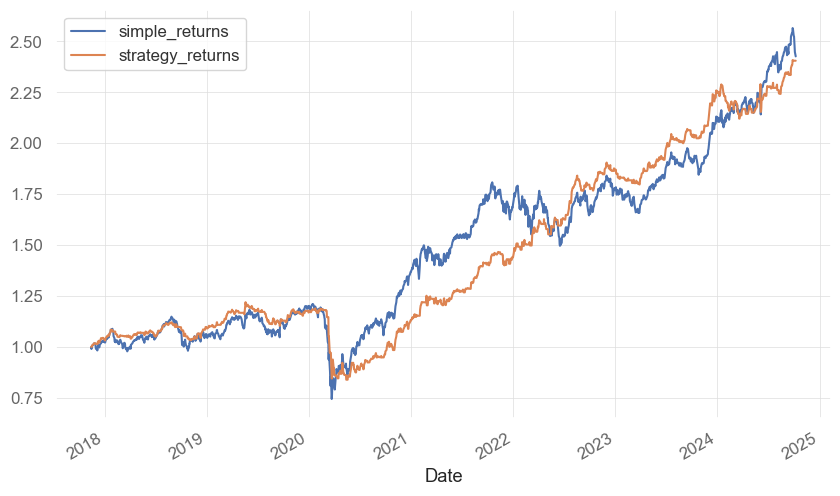

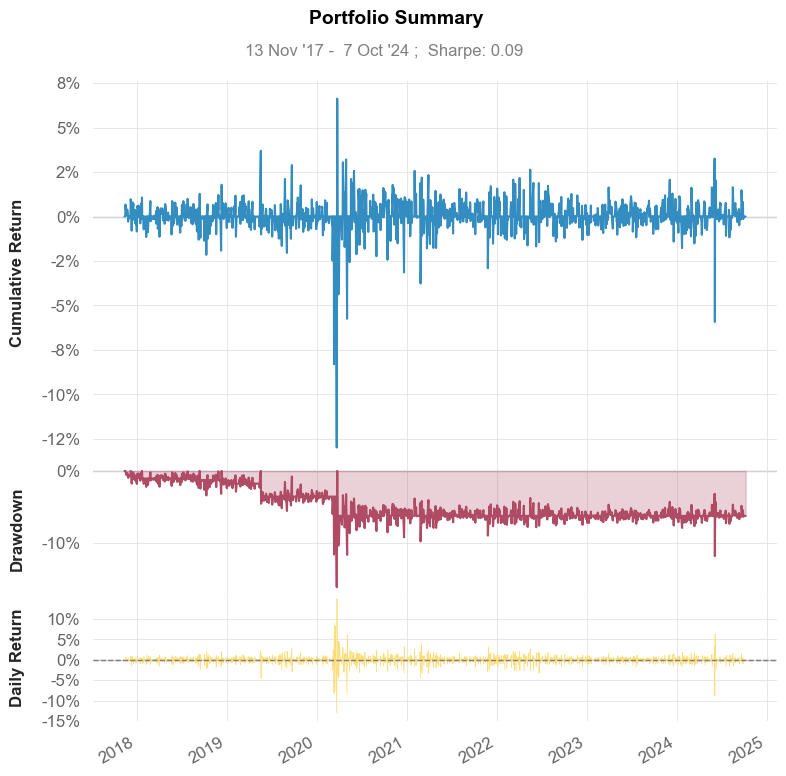

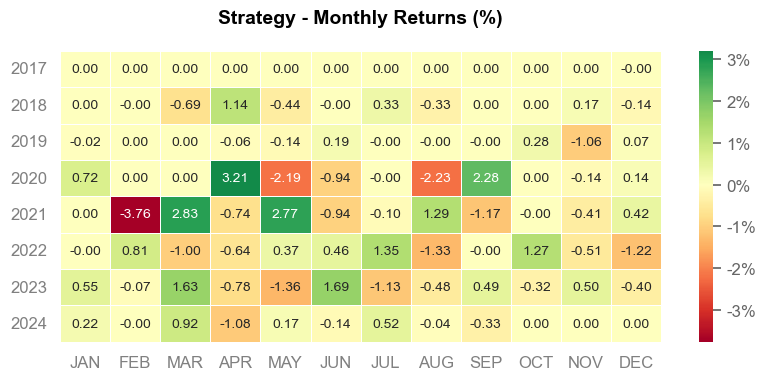

<bound method backtesting.analysis of <__main__.backtesting object at 0x0000017408109A90>>

In [6]:
end = dt.datetime.today()
start = end - pd.Timedelta(days = 2520)
s1 = backtesting('^NSEI',start,end)
s1.analysis